In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from datetime import date

In [296]:
# 한글 폰트 설정 (Windows 기준: 'Malgun Gothic', Mac: 'AppleGothic')
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
# plt.rcParams['font.family'] = 'AppleGothic'  # Mac

# 마이너스(-) 깨짐 방지
mpl.rcParams['axes.unicode_minus'] = False

In [297]:
df_ta = pd.read_csv('../datapipeline/data/TA_data.csv', parse_dates=['날짜'])
df_pm10 = pd.read_csv('../datapipeline/data/PM10_data.csv', parse_dates=['날짜'])

In [298]:
df_ta

,날짜,TA_AVG,TA_MAX,TA_MIN
0,1907-10-01,13.5,20.7,7.9
1,1907-10-02,16.2,22.0,7.9
2,1907-10-03,16.2,21.3,13.1
3,1907-10-04,16.5,22.0,11.2
4,1907-10-05,17.6,25.4,10.9
...,...,...,...,...
41782,2025-05-23,19.4,22.2,15.4
41783,2025-05-24,15.6,19.3,13.0
41784,2025-05-25,17.4,22.6,11.7
41785,2025-05-26,19.7,26.2,13.0


In [299]:
df_pm10

,날짜,PM10_MIN,PM10_MAX,PM10_AVG
0,2008-04-28,47.0,93.0,75.5
1,2008-04-29,53.0,128.0,85.2
2,2008-04-30,34.0,130.0,73.5
3,2008-05-01,35.0,85.0,55.6
4,2008-05-02,42.0,95.0,59.8
...,...,...,...,...
6216,2025-05-23,6.0,49.0,28.4
6217,2025-05-24,0.0,40.0,19.5
6218,2025-05-25,2.0,42.0,20.2
6219,2025-05-26,20.0,75.0,41.0


오늘 날짜 데이터 삭제 
- 기상청에서 아직 반영이 안됨 => 기온이 -99.0 도로 설정
- 혹시 모를 상황에 대비하여 이상치(-99.0) 처리

In [300]:
today = date.today()
df_ta = df_ta[df_ta['날짜'] < pd.to_datetime(today)]
df_pm10 = df_pm10[df_pm10['날짜'] < pd.to_datetime(today)]

# 데이터 최신 날짜 확인
print("기온 데이터 최신 날짜:", df_ta['날짜'].max())
print("PM10 데이터 최신 날짜:", df_pm10['날짜'].max())

기온 데이터 최신 날짜: 2025-05-27 00:00:00
PM10 데이터 최신 날짜: 2025-05-27 00:00:00


In [301]:
df_ta = df_ta.replace(-99.0, np.nan).dropna()

# 기온 데이터 EDA

## 전체 기온 추이

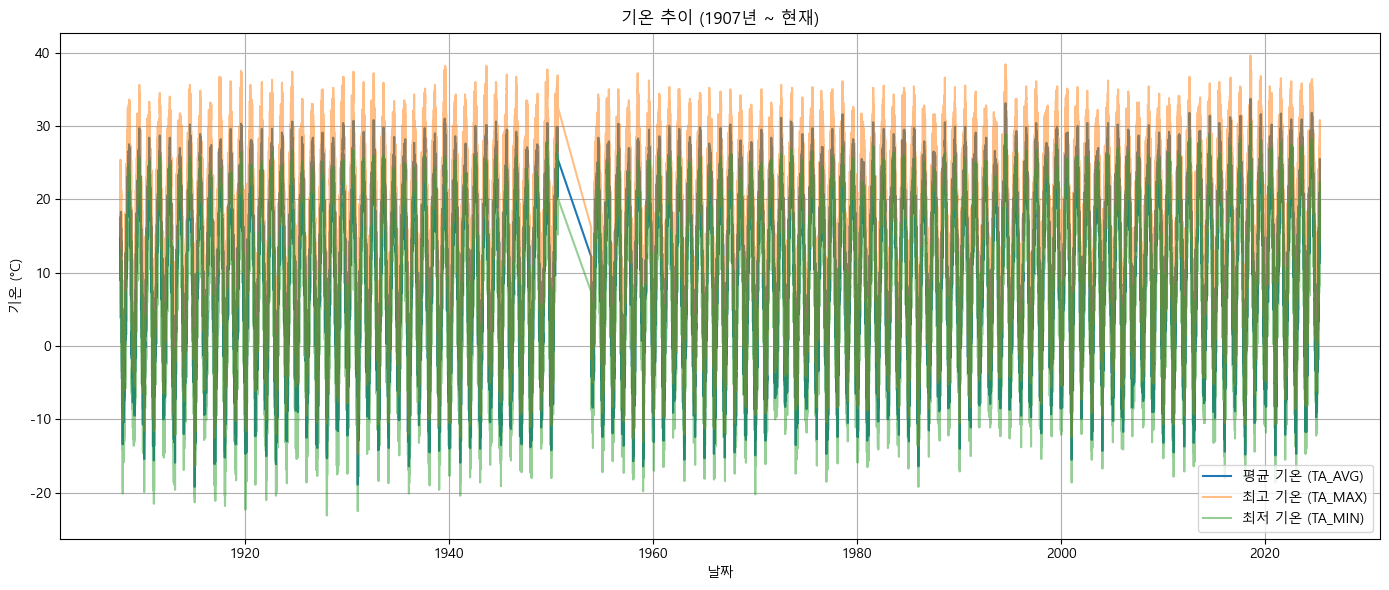

In [302]:
plt.figure(figsize=(14, 6))
plt.plot(df_ta['날짜'], df_ta['TA_AVG'], label='평균 기온 (TA_AVG)')
plt.plot(df_ta['날짜'], df_ta['TA_MAX'], label='최고 기온 (TA_MAX)', alpha=0.5)
plt.plot(df_ta['날짜'], df_ta['TA_MIN'], label='최저 기온 (TA_MIN)', alpha=0.5)
plt.title('기온 추이 (1907년 ~ 현재)')
plt.xlabel('날짜')
plt.ylabel('기온 (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 1950년대 단절 구간 발견
-> 기상청 데이터 중 일부 년도는 관측이 누락된 상태일 수 있음

단절 구간 확인

In [303]:
df_ta_sorted = df_ta.sort_values('날짜')
df_ta_sorted['날짜_차이'] = df_ta_sorted['날짜'].diff()

# 날짜 단절 구간 추출
missing_dates = df_ta_sorted[df_ta_sorted['날짜_차이'] > pd.Timedelta(days=1)]

In [304]:
print("날짜 단절 구간: ")
print(missing_dates[['날짜', '날짜_차이']])

날짜 단절 구간: 
              날짜     날짜_차이
15676 1953-12-01 1188 days
39003 2017-10-13    2 days
40764 2022-08-09    2 days


### 평균 기온 / 최고 기온/ 최소 기온 각각 확인

In [305]:
plt.rcParams['figure.figsize'] = (40, 10) 

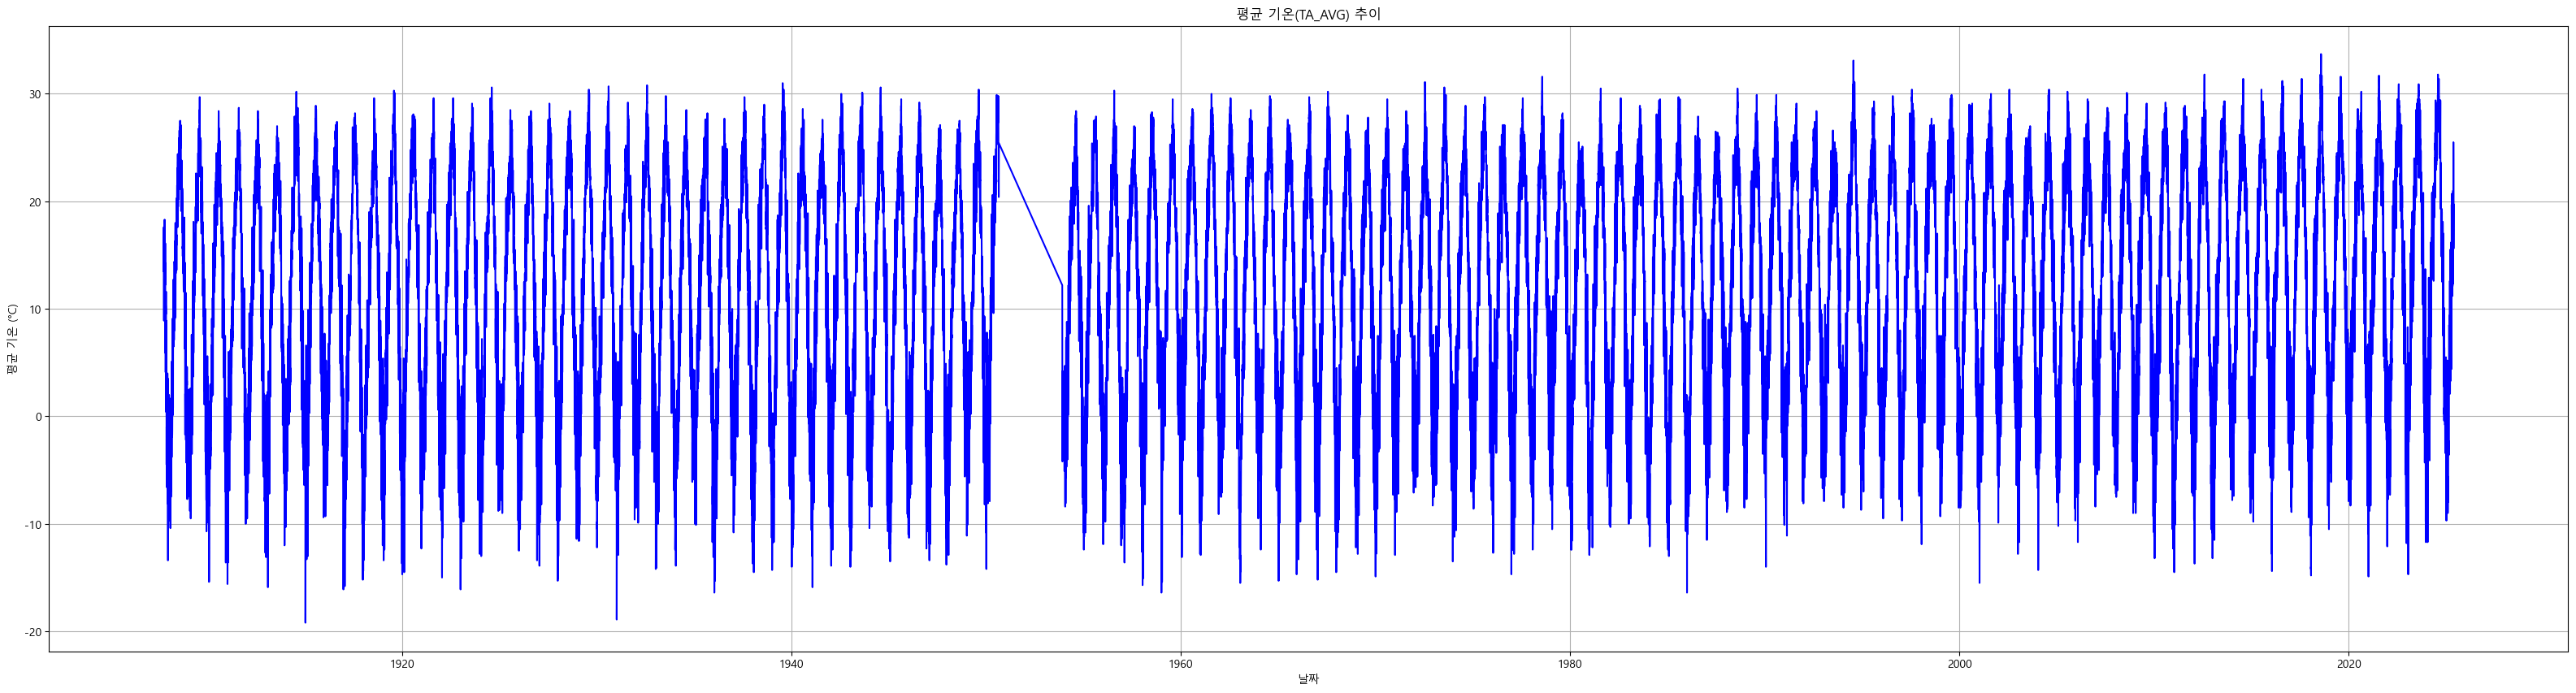

In [306]:
plt.figure()
plt.plot(df_ta['날짜'], df_ta['TA_AVG'], color='blue')
plt.title('평균 기온(TA_AVG) 추이')
plt.xlabel('날짜')
plt.ylabel('평균 기온 (°C)')
plt.grid(True)
plt.show()

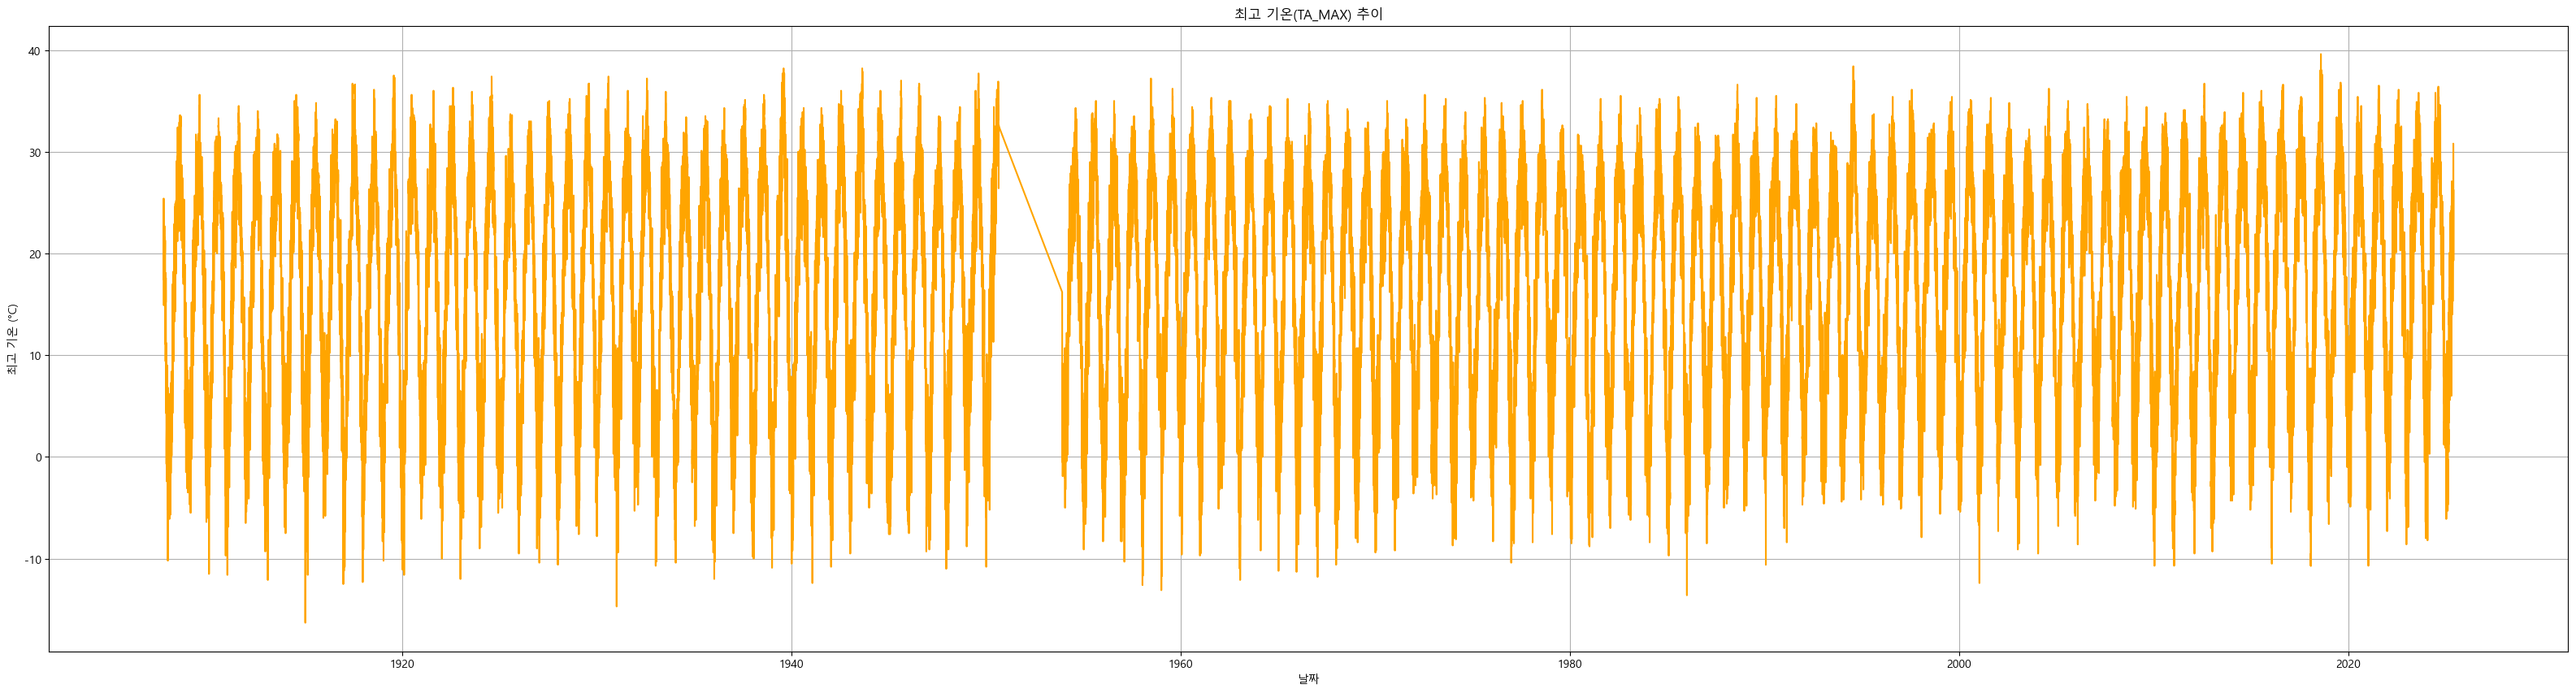

In [307]:
plt.figure()
plt.plot(df_ta['날짜'], df_ta['TA_MAX'], color='orange')
plt.title('최고 기온(TA_MAX) 추이')
plt.xlabel('날짜')
plt.ylabel('최고 기온 (°C)')
plt.grid(True)
plt.show()

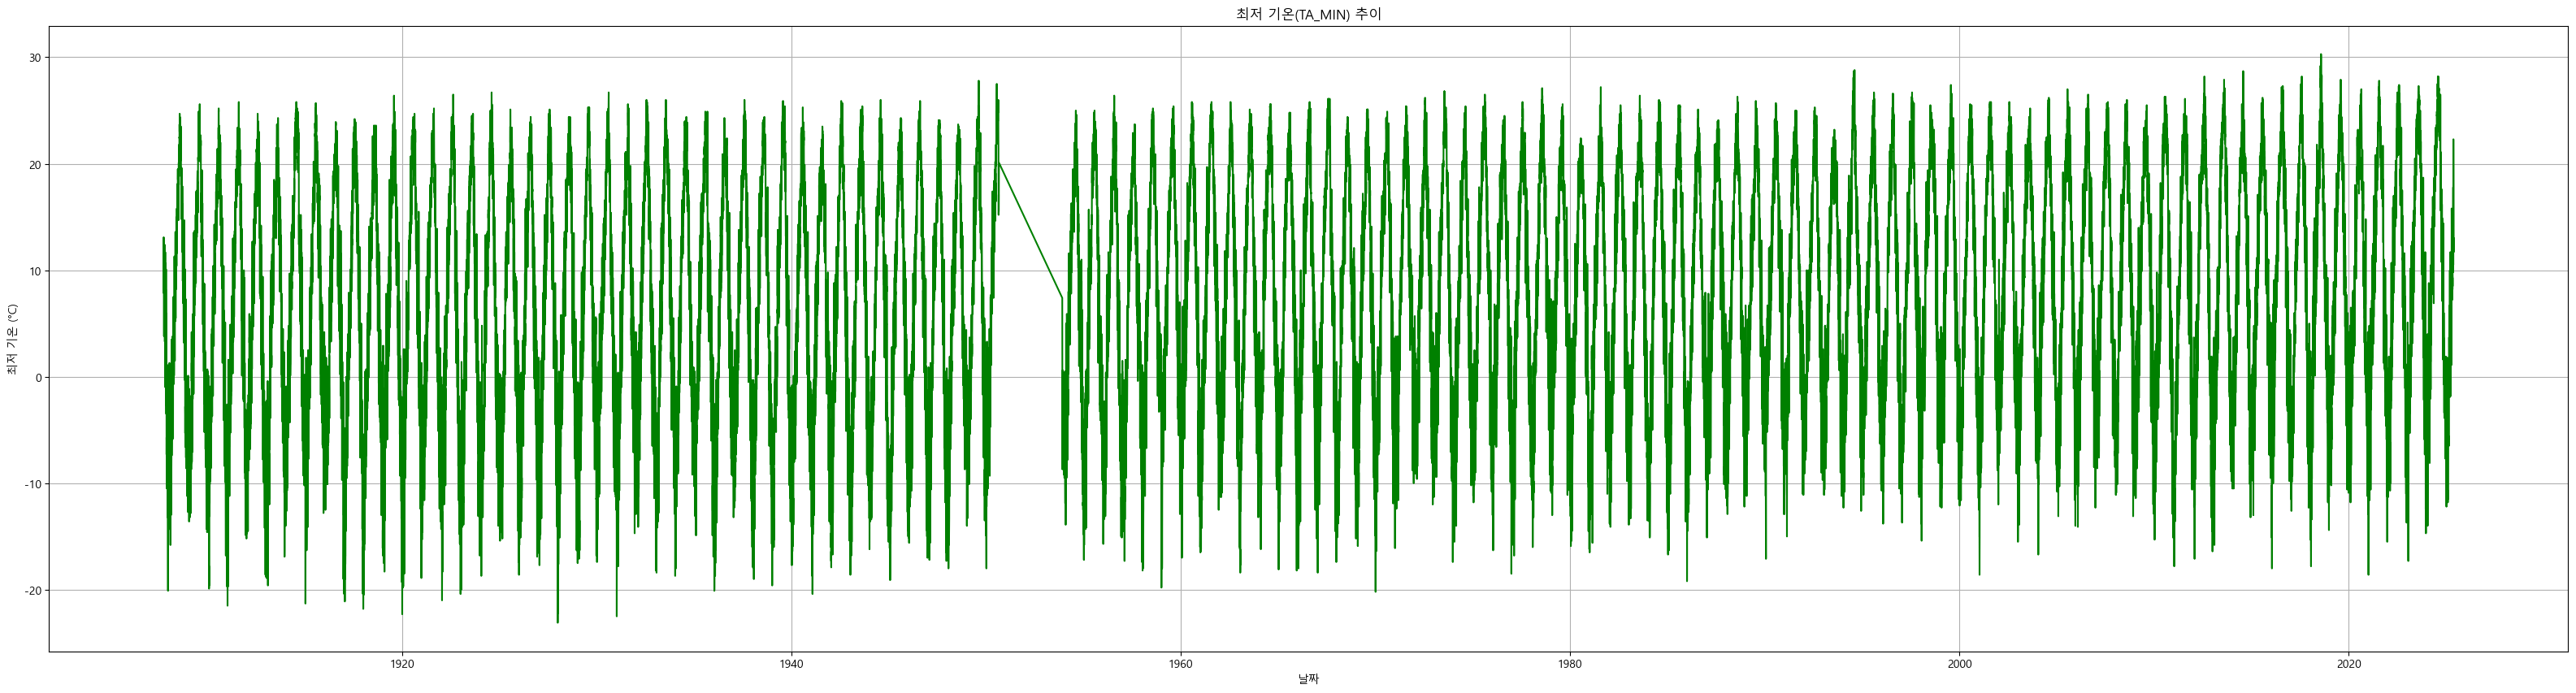

In [308]:
plt.figure()
plt.plot(df_ta['날짜'], df_ta['TA_MIN'], color='green')
plt.title('최저 기온(TA_MIN) 추이')
plt.xlabel('날짜')
plt.ylabel('최저 기온 (°C)')
plt.grid(True)
plt.show()

## 10년 단위 평균 기온 추이

10년 단위 평균 기온 (°C):
            TA_AVG     TA_MAX    TA_MIN
year_!0                                
1900      9.912637  15.279465  5.173512
1910     10.666457  16.144441  5.925164
1920     11.005037  16.451300  5.977991
1930     11.050685  16.524973  6.480723
1940     11.052395  16.686203  6.267287
1950     11.313225  16.450913  7.026613
1960     11.721872  16.522310  7.608705
1970     11.946988  16.734967  8.037870
1980     11.870025  16.541719  7.879907
1990     12.800657  17.384803  8.797180
2000     12.911142  17.238900  9.146126
2010     12.934895  17.682827  8.951109
2020     13.359990  18.082961  9.328600


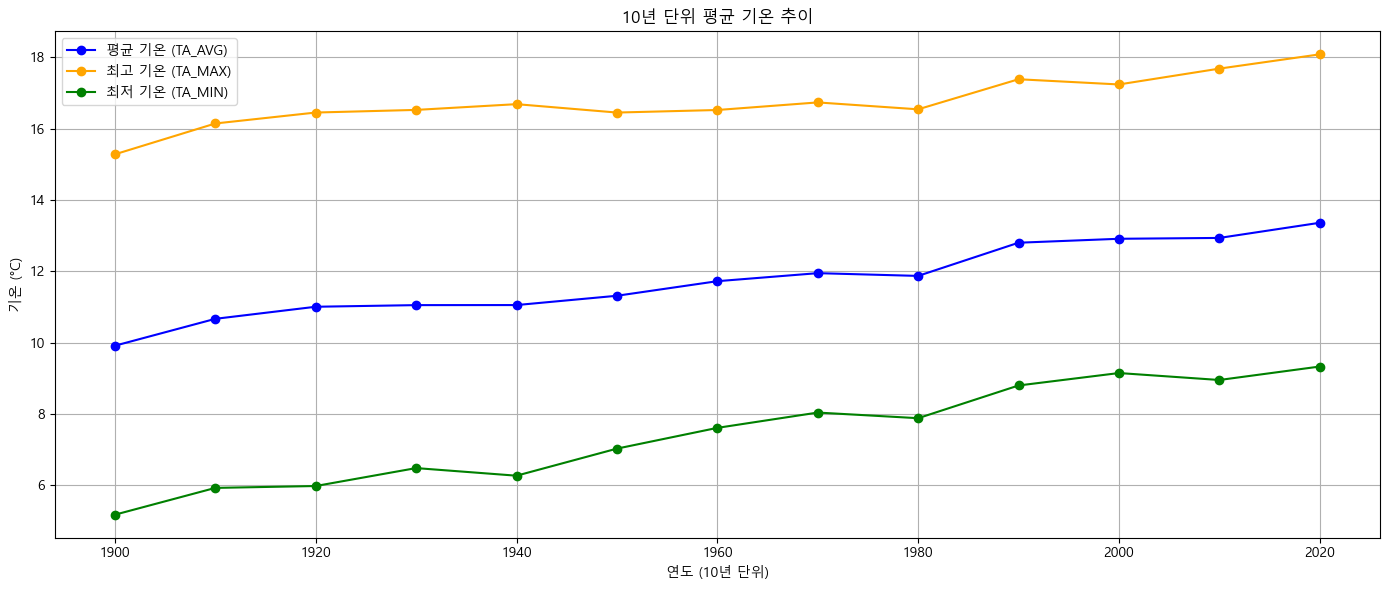

In [309]:
df_ta['year'] = df_ta['날짜'].dt.year
df_ta['year_!0'] = (df_ta['year'] // 10) * 10

# 10년 단위 평균값
ten_year_avg = df_ta.groupby('year_!0')[['TA_AVG', 'TA_MAX', 'TA_MIN']].mean()
print("10년 단위 평균 기온 (°C):")
print(ten_year_avg)

# 10년 단위 평균값 그래프
plt.figure(figsize=(14,6))
plt.plot(ten_year_avg.index, ten_year_avg['TA_AVG'], marker='o', label='평균 기온 (TA_AVG)', color='blue')
plt.plot(ten_year_avg.index, ten_year_avg['TA_MAX'], marker='o', label='최고 기온 (TA_MAX)', color='orange')
plt.plot(ten_year_avg.index, ten_year_avg['TA_MIN'], marker='o', label='최저 기온 (TA_MIN)', color='green')

plt.title('10년 단위 평균 기온 추이')
plt.xlabel('연도 (10년 단위)')
plt.ylabel('기온 (°C)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### 1950년대 결측 구간 전후 추세 결과

평균 기온 (TA_AVG): 1940 → 1950 → 1960년대 순으로 점진적 증가 (약 0.3~0.4℃씩 상승)

최고 기온 (TA_MAX): 16.4~16.7℃ 수준에서 크게 변화 없음 (안정적인 추세 유지)

최저 기온 (TA_MIN): 1940 → 1950 → 1960년대 순으로 0.76℃ 증가, 0.58℃ 증가 (꾸준히 상승하는 추세)

### 1950년대 결측 구간은 보간(interpolation) 처리해도 무방하며, 보간 진행 시에도 전체 추세(평균/최대/최소 기온)에는 큰 왜곡이 없을 것으로 판단됨.
#### => 기온은 날짜기반 데이터이므로 시간 보간 사용

In [310]:
# 1보간 적용 (시간 기반)
df_ta_interpolated = df_ta.set_index('날짜').interpolate(method='time').reset_index()

# 210년 단위 평균값 재계산
df_ta_interpolated['year'] = df_ta_interpolated['날짜'].dt.year
df_ta_interpolated['year_10'] = (df_ta_interpolated['year'] // 10) * 10

ten_year_avg_interpolated = df_ta_interpolated.groupby('year_10')[['TA_AVG', 'TA_MAX', 'TA_MIN']].mean().round(2)

보간 후 10년 단위 평균 기온 (°C):
         TA_AVG  TA_MAX  TA_MIN
year_10                        
1900       9.91   15.28    5.17
1910      10.67   16.14    5.93
1920      11.01   16.45    5.98
1930      11.05   16.52    6.48
1940      11.05   16.69    6.27
1950      11.31   16.45    7.03
1960      11.72   16.52    7.61
1970      11.95   16.73    8.04
1980      11.87   16.54    7.88
1990      12.80   17.38    8.80
2000      12.91   17.24    9.15
2010      12.93   17.68    8.95
2020      13.36   18.08    9.33


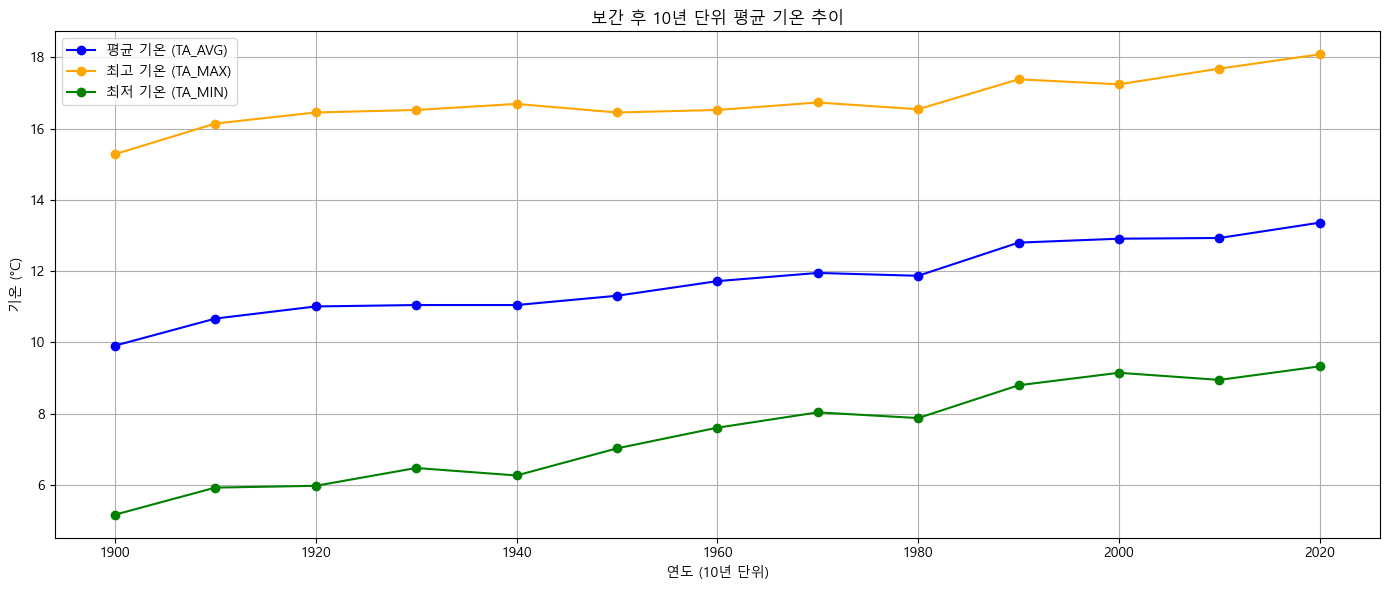

In [311]:
print("보간 후 10년 단위 평균 기온 (°C):")
print(ten_year_avg_interpolated)

plt.figure(figsize=(14,6))
plt.plot(ten_year_avg_interpolated.index, ten_year_avg_interpolated['TA_AVG'], marker='o', label='평균 기온 (TA_AVG)', color='blue')
plt.plot(ten_year_avg_interpolated.index, ten_year_avg_interpolated['TA_MAX'], marker='o', label='최고 기온 (TA_MAX)', color='orange')
plt.plot(ten_year_avg_interpolated.index, ten_year_avg_interpolated['TA_MIN'], marker='o', label='최저 기온 (TA_MIN)', color='green')

plt.title('보간 후 10년 단위 평균 기온 추이')
plt.xlabel('연도 (10년 단위)')
plt.ylabel('기온 (°C)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### 보간 전후 비교 결과:

- 보간 후에도 전체 패턴(연도별 증가, 계절성)에는 변화가 없으며, 급격한 변동이나 이상치 발생은 확인되지 않음
- 1950년대 결측 구간은 주변 연도와의 자연스러운 흐름을 유지하며 안정적으로 연결됨
- 평균 기온(TA_AVG), 최고 기온(TA_MAX), 최저 기온(TA_MIN) 모두 안정적인 추세 유지

#### => 1950년대 결측 구간은 보간(interpolation) 처리해도 무방하며, 보간 처리된 데이터를 최종 모델링 데이터로 사용해도 충분히 신뢰할 수 있음을 확인

## 월별 기온 추이

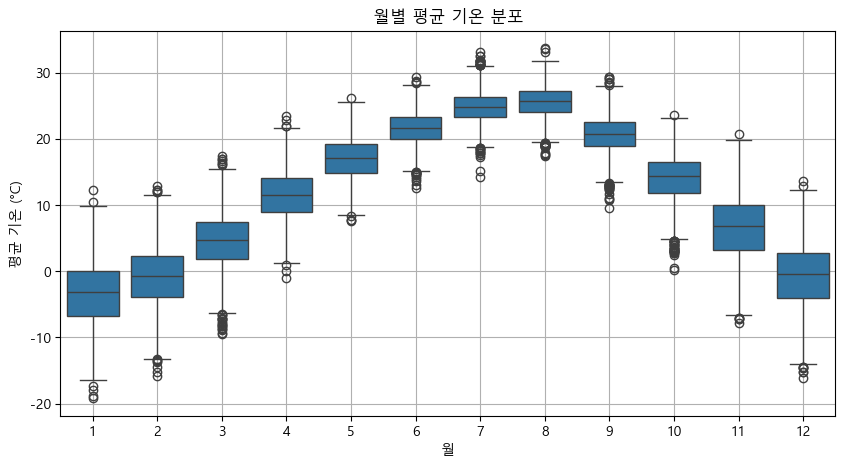

In [312]:
df_ta['month'] = df_ta['날짜'].dt.month
plt.figure(figsize=(10, 5))
sns.boxplot(x='month', y='TA_AVG', data=df_ta)
plt.title('월별 평균 기온 분포')
plt.xlabel('월')
plt.ylabel('평균 기온 (°C)')
plt.grid(True)
plt.show()

### 월별 평균 기온 분포 분석 결과
- 1~2월, 12월 (겨울철):
평균 기온이 낮고, 박스 길이가 길어 변동성 큼. 음수 값 분포 포함.
일부 극단값(한파)은 이상치로 보이나, 통계적 이상치(outlier) 처리 필요 없음.

- 6~8월 (여름철):
평균 기온이 높으며, 박스 길이가 짧아 기온 안정성 높음.
20~30℃ 구간에 주로 분포.

- 3-5월, 911월 (봄/가을):
평균 기온은 중간 단계, 사계절의 완만한 기온 변화를 반영.

- 이상치(outlier):
박스 외부에 일부 극단값이 있으나, 이는 한파/폭염 등 계절적 특성일 가능성이 높음.

- 계절성 (Seasonality):
월별로 기온이 뚜렷하게 구분되며, 전형적인 사계절 패턴이 잘 반영됨.

In [313]:
# IQR 기반 이상치 확인
Q1 = df_ta['TA_AVG'].quantile(0.25)
Q3 = df_ta['TA_AVG'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 값 개수 확인
outliers = df_ta[(df_ta['TA_AVG'] < lower_bound) | (df_ta['TA_AVG'] > upper_bound)]
print("평균 기온(TA_AVG) 이상치 개수:", len(outliers))

평균 기온(TA_AVG) 이상치 개수: 0


통계적 이상치(IQR 기준) 개수 확인 결과: 평균 기온(TA_AVG) 이상치 개수: 0개
→ 이상치 처리 불필요.

- 월별 평균 기온 데이터는 계절성 패턴이 명확히 드러나 있으며, 통계적 이상치는 없음.
##### => 계절성에 따른 극단값(한파, 폭염)은 자연스러운 기상 특성으로 해석되며, 별도의 이상치 제거 과정은 불필요함.

---

# 미세먼지 EDA

## 전체 미세먼지 추이 확인

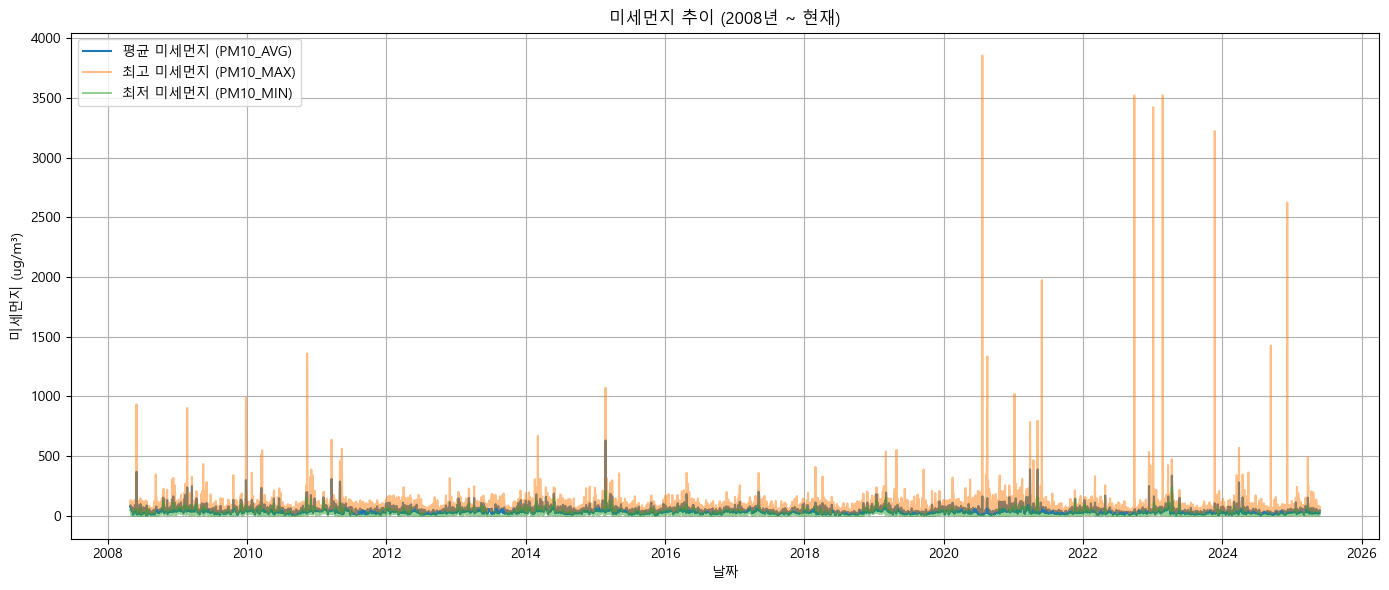

In [314]:
plt.figure(figsize=(14, 6))
plt.plot(df_pm10['날짜'], df_pm10['PM10_AVG'], label='평균 미세먼지 (PM10_AVG)')
plt.plot(df_pm10['날짜'], df_pm10['PM10_MAX'], label='최고 미세먼지 (PM10_MAX)', alpha=0.5)
plt.plot(df_pm10['날짜'], df_pm10['PM10_MIN'], label='최저 미세먼지 (PM10_MIN)', alpha=0.5)
plt.title('미세먼지 추이 (2008년 ~ 현재)')
plt.xlabel('날짜')
plt.ylabel('미세먼지 (ug/m³)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 미세먼지 평균/최소/최고 각각 확인

In [315]:
plt.rcParams['figure.figsize'] = (30, 5) 

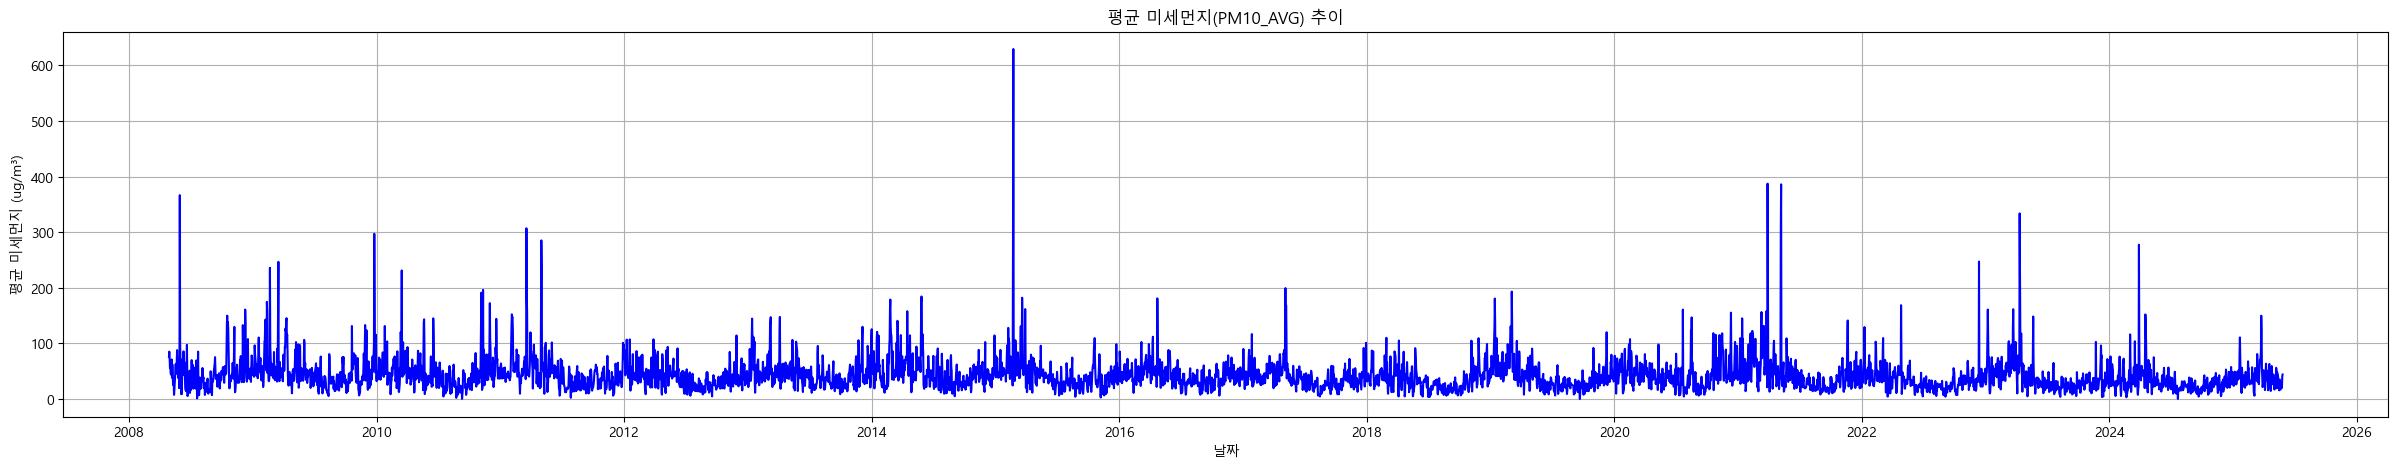

In [316]:
plt.figure()
plt.plot(df_pm10['날짜'], df_pm10['PM10_AVG'], color='blue')
plt.title('평균 미세먼지(PM10_AVG) 추이')
plt.xlabel('날짜')
plt.ylabel('평균 미세먼지 (ug/m³)')
plt.grid(True)
plt.show()

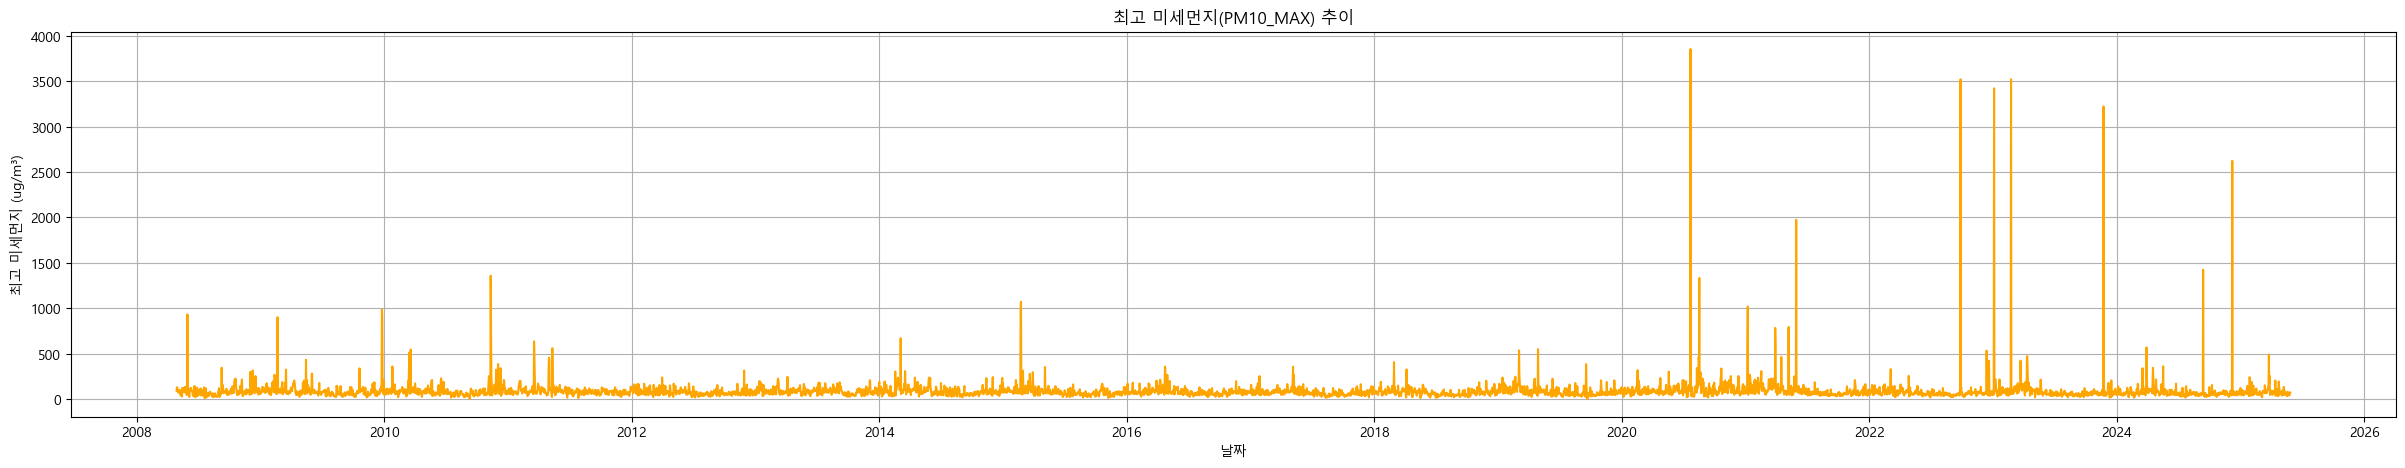

In [317]:
plt.figure()
plt.plot(df_pm10['날짜'], df_pm10['PM10_MAX'], color='orange')
plt.title('최고 미세먼지(PM10_MAX) 추이')
plt.xlabel('날짜')
plt.ylabel('최고 미세먼지 (ug/m³)')
plt.grid(True)
plt.show()

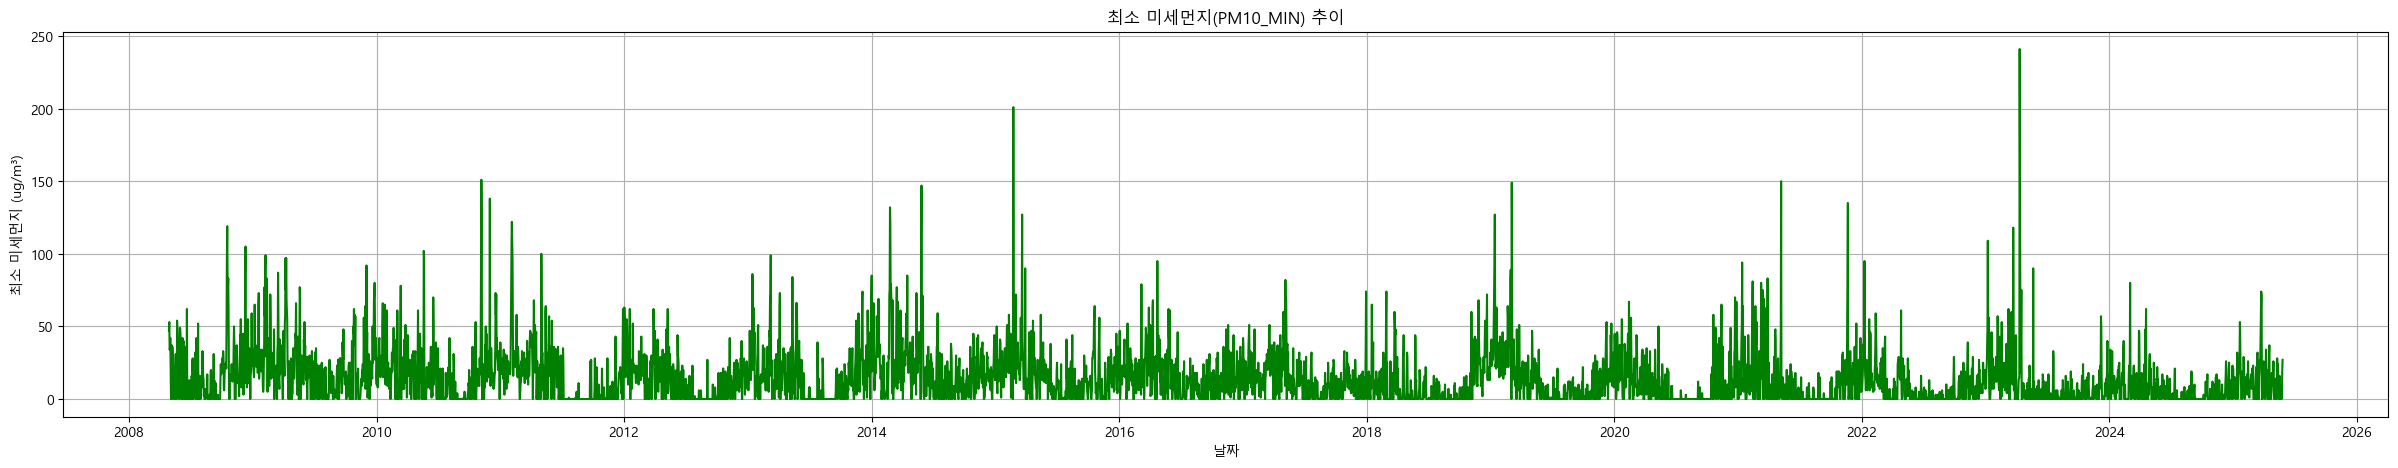

In [318]:
plt.figure()
plt.plot(df_pm10['날짜'], df_pm10['PM10_MIN'], color='green')
plt.title('최소 미세먼지(PM10_MIN) 추이')
plt.xlabel('날짜')
plt.ylabel('최소 미세먼지 (ug/m³)')
plt.grid(True)
plt.show()

PM10_AVG (평균 미세먼지)
- 대체로 0~100 µg/m³에서 안정적으로 분포
- 특정 시점 (예: 2014년, 2022년 이후)에 100~600 이상 급격한 피크 확인
→ 이상치로 의심되는 값들

PM10_MAX (최고 미세먼지)
- 평균/최소보다 훨씬 큰 값들이 다수
- 특히 2014년, 2022~2024년: 1000, 2000, 3000 이상 극단값 발생
→ 데이터 오류나 황사/화재 같은 사건 발생 되었을 확률

PM10_MIN (최저 미세먼지)
- 대체로 0~50 사이, 안정적인 분포
- 일부 100~200 구간의 급격한 피크 존재 (덜 흔함)

### 이상치의 주된 특징
- 특정 연도(2014, 2022~2024)에 집중
- 평균/최대에서 특히 두드러짐 (최소는 적음)

→ 이 이상치가 자연스러운 계절성/환경 요인(황사, 화재)인지, 오류인지 확인 필요

## 월별 미세먼지 통계 및 시각화

In [319]:
# 월별 통계
df_pm10['month'] = df_pm10['날짜'].dt.month
monthly_stats = df_pm10.groupby('month')[['PM10_MIN', 'PM10_AVG', 'PM10_MAX']].agg(['mean', 'min', 'max']).reset_index()

print("월별 통계:")
print(monthly_stats)

월별 통계:
   month   PM10_MIN               PM10_AVG                PM10_MAX        \
               mean  min    max       mean  min    max        mean   min   
0      1  23.060721  0.0  127.0  51.082732  5.5  180.7   98.544592  26.0   
1      2  22.616667  0.0  201.0  53.608958  3.2  629.4  104.543750  14.0   
2      3  21.604563  0.0  149.0  58.546388  4.4  387.3  110.538023  19.0   
3      4  18.220273  0.0  241.0  51.690643  4.6  333.8   97.664717  17.0   
4      5  17.351986  0.0  150.0  49.748375  4.9  386.1  100.025271  12.0   
5      6   9.641176  0.0   71.0  37.054314  4.5  145.1   76.913725  16.0   
6      7   5.091778  0.0   59.0  29.365583  0.2  160.8   74.661568   9.0   
7      8   4.247601  0.0   44.0  27.265451  2.2  146.8   67.531670  16.0   
8      9   4.872299  0.0   48.0  26.043222  0.0   75.7   70.976424   0.0   
9     10   9.986667  0.0  119.0  34.737714  6.1  149.9   68.754286  19.0   
10    11  14.305882  0.0  151.0  42.835882  2.8  196.2   89.774510  12.0   
11   

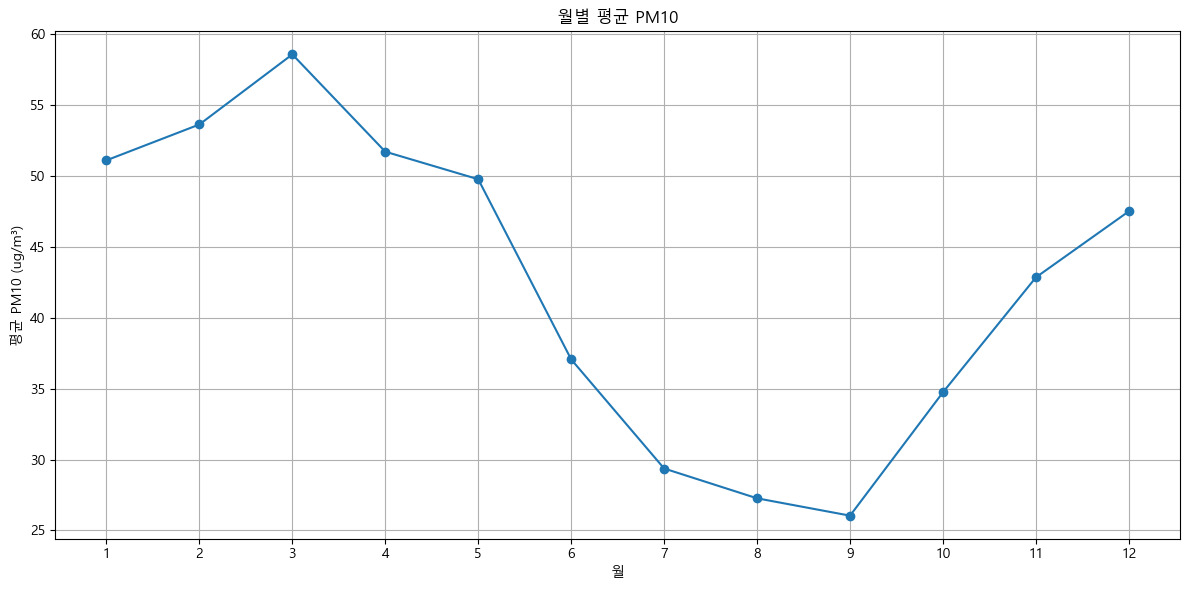

In [320]:
# 월별 평균 PM10 시각화
plt.figure(figsize=(12,6))
plt.plot(monthly_stats['month'], monthly_stats[('PM10_AVG', 'mean')], marker='o')
plt.title('월별 평균 PM10')
plt.xlabel('월')
plt.ylabel('평균 PM10 (ug/m³)')
plt.xticks(range(1,13))
plt.grid(True)
plt.tight_layout()
plt.show()

## 계절별 통계 및 시각화

In [321]:
# 계절 구분 함수
def get_season(month):
    if month in [3,4,5]:
        return '봄'
    elif month in [6,7,8]:
        return '여름'
    elif month in [9,10,11]:
        return '가을'
    else:
        return '겨울'

df_pm10['season'] = df_pm10['month'].apply(get_season)

# 계절별 통계
seasonal_stats = df_pm10.groupby('season')[['PM10_MIN', 'PM10_AVG', 'PM10_MAX']].agg(['mean', 'min', 'max']).reset_index()
seasonal_stats['season'] = pd.Categorical(seasonal_stats['season'], categories=['봄', '여름', '가을', '겨울'], ordered=True)
seasonal_stats = seasonal_stats.sort_values('season')

print("계절별 통계:")
print(seasonal_stats)

계절별 통계:
  season   PM10_MIN               PM10_AVG                PM10_MAX        \
               mean  min    max       mean  min    max        mean   min   
2      봄  19.035782  0.0  241.0  53.278908  4.4  387.3  102.736347  12.0   
3     여름   6.301802  0.0   71.0  31.184813  0.2  160.8   73.010296   9.0   
0     가을   9.727332  0.0  151.0  34.546373  0.0  196.2   76.430052   0.0   
1     겨울  21.383660  0.0  201.0  50.647386  3.2  629.4   98.498693  14.0   

           
      max  
2  1974.0  
3  3856.0  
0  3522.0  
1  3523.0  


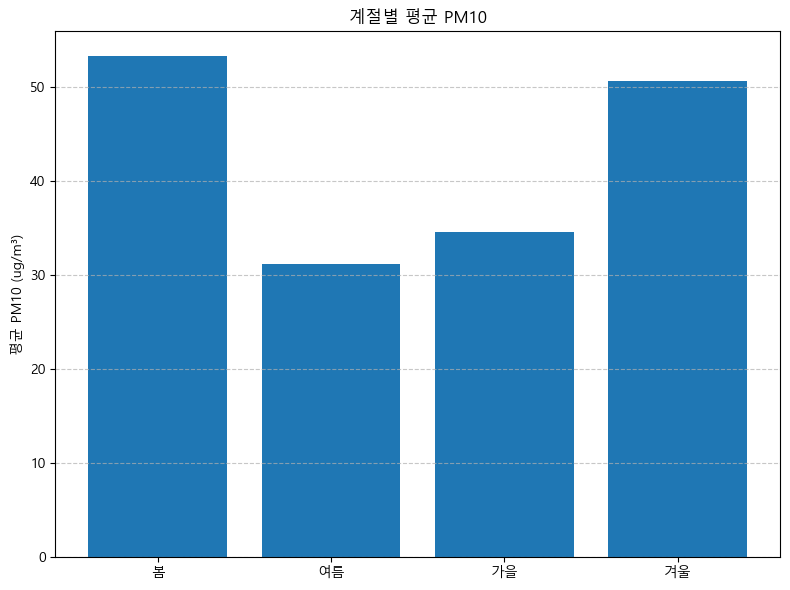

In [322]:
# 계절별 평균 PM10 시각화
plt.figure(figsize=(8,6))
plt.bar(seasonal_stats['season'], seasonal_stats[('PM10_AVG', 'mean')])
plt.title('계절별 평균 PM10')
plt.ylabel('평균 PM10 (ug/m³)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 연도별 통계 및 시각화

In [323]:
# 연도별 통계
df_pm10['year'] = df_pm10['날짜'].dt.year
yearly_stats = df_pm10.groupby('year')[['PM10_MIN', 'PM10_AVG', 'PM10_MAX']].agg(['mean', 'min', 'max']).reset_index()

print("연도별 통계:")
print(yearly_stats)

연도별 통계:
    year   PM10_MIN               PM10_AVG                PM10_MAX        \
               mean  min    max       mean  min    max        mean   min   
0   2008  17.391129  0.0  119.0  46.179435  1.2  366.6   87.177419   9.0   
1   2009  22.589041  0.0   99.0  52.122466  5.4  297.1   95.249315  19.0   
2   2010  17.933884  0.0  151.0  46.845730  0.2  231.2   92.575758   2.0   
3   2011  14.931319  0.0  122.0  46.445330  2.3  307.0   89.659341  11.0   
4   2012  12.516393  0.0   63.0  38.562022  4.8  114.3   74.245902  16.0   
5   2013  15.462810  0.0   99.0  45.601928  8.8  147.6   86.746556  24.0   
6   2014  21.095890  0.0  147.0  49.025753  5.0  184.4   87.767123  18.0   
7   2015  16.972603  0.0  201.0  44.827123  2.8  629.4   83.572603  12.0   
8   2016  16.226776  0.0   95.0  42.309563  6.1  181.0   79.475410  21.0   
9   2017  13.566667  0.0   82.0  38.862500  4.5  199.5   71.902778  16.0   
10  2018   9.357143  0.0   74.0  34.487637  3.7  110.1   72.870879  12.0   
11  

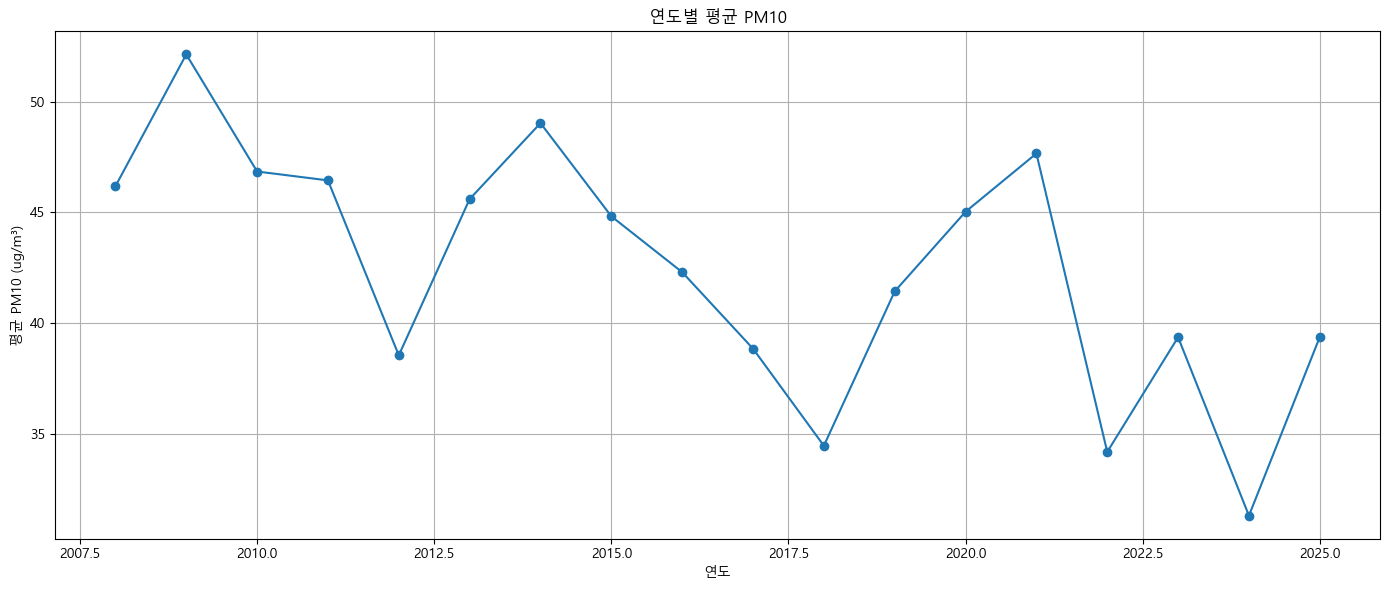

In [324]:
# 연도별 평균 PM10 시각화
plt.figure(figsize=(14,6))
plt.plot(yearly_stats['year'], yearly_stats[('PM10_AVG', 'mean')], marker='o')
plt.title('연도별 평균 PM10')
plt.xlabel('연도')
plt.ylabel('평균 PM10 (ug/m³)')
plt.grid(True)
plt.tight_layout()
plt.show()

### 미세먼지 EDA 분석 결론
월별 PM10 분석
- 3월~4월에 평균 미세먼지 농도가 가장 높음
- 6월~8월에는 평균 미세먼지 농도가 가장 낮음 (여름철)
- 12월~1월에 다시 증가 추세를 보임 (겨울철 영향)

계절별 평균 PM10 분석
- 봄: 평균 PM10 가장 높음 -> 황사 영향, 고농도 발생 가능성
- 겨울: 평균 PM10 높음 -> 대기 정체, 난방 영향 등
- 가을: 평균 PM10 중간 수준	-> 비교적 안정된 기상 조건
- 여름: 평균 PM10 가장 낮음 ->	비와 공기 정화 효과

### => 봄 > 겨울 > 가을 > 여름 순으로 PM10 농도가 높음

연도별 PM10 분석
- 전체적으로는 점진적인 감소 추세를 보임
- 특정 연도( 2015, 2020 등)에서 일시적인 급등 발생
- 일부 연도에서 1000 이상의 매우 높은 값 발견 → 이상치 의심

데이터 특이사항
- PM10 값 중 일부에서 비정상적으로 높은 수치(예: 1000 이상) 발견됨
- 데이터 이상치 처리 필요성 확인 (제거 vs Capping)

## 미세먼지 이상치 분석

### PM10_AVG(평균 미세먼지) 이상치 분포

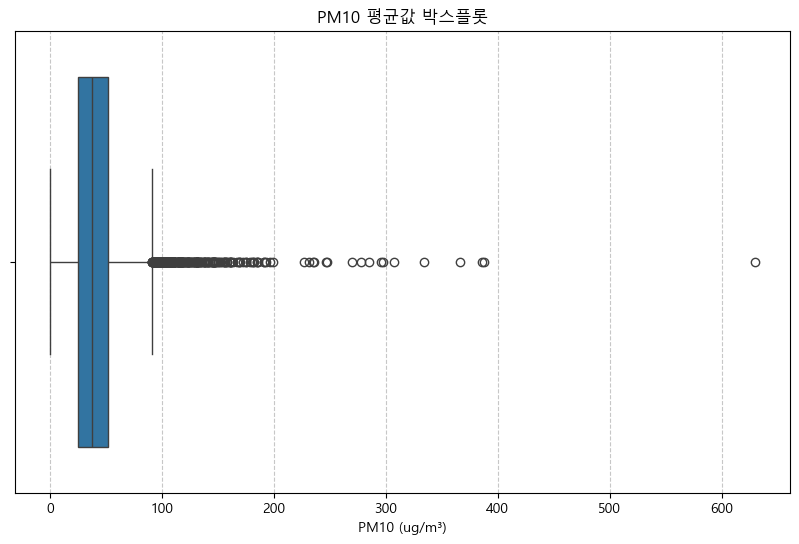

In [325]:
# 박스플롯
plt.figure(figsize=(10,6))
sns.boxplot(x=df_pm10['PM10_AVG'])
plt.title('PM10 평균값 박스플롯')
plt.xlabel('PM10 (ug/m³)')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

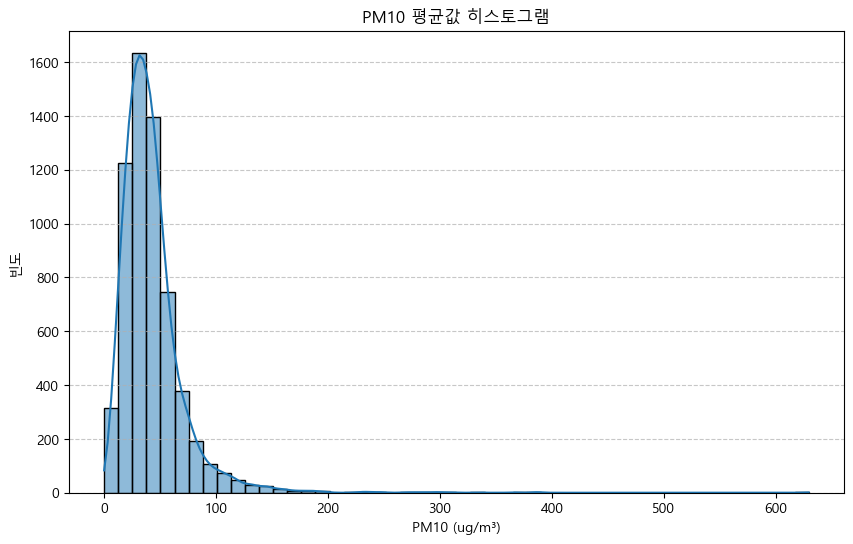

In [326]:
# 히스토그램
plt.figure(figsize=(10,6))
sns.histplot(df_pm10['PM10_AVG'], bins=50, kde=True)
plt.title('PM10 평균값 히스토그램')
plt.xlabel('PM10 (ug/m³)')
plt.ylabel('빈도')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

### IQR 기반 이상치 기준 계산

In [327]:
# IQR 계산
Q1 = df_pm10['PM10_AVG'].quantile(0.25)
Q3 = df_pm10['PM10_AVG'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"이상치 기준:")
print(f" - 하한선 (Lower Bound): {lower_bound}")
print(f" - 상한선 (Upper Bound): {upper_bound}")

# 이상치 개수 확인
outliers = df_pm10[(df_pm10['PM10_AVG'] < lower_bound) | (df_pm10['PM10_AVG'] > upper_bound)]
print(f"이상치 개수: {len(outliers)}")

이상치 기준:
 - 하한선 (Lower Bound): -13.999999999999996
 - 상한선 (Upper Bound): 90.8
이상치 개수: 299


### 이상치 발생 날짜 확인

In [334]:
# 이상치 날짜 추출
outlier_dates = outliers[['날짜', 'PM10_AVG']].sort_values('날짜')

print(f"이상치 발생 날짜 개수: {len(outlier_dates)}")
print(outlier_dates)

이상치 발생 날짜 개수: 299
             날짜  PM10_AVG
32   2008-05-30     366.6
33   2008-05-31     100.5
53   2008-06-20      97.4
170  2008-10-15      91.4
171  2008-10-16     137.1
...         ...       ...
5816 2024-04-18     137.4
5817 2024-04-19     104.6
6094 2025-01-21     110.8
6157 2025-03-25     149.8
6158 2025-03-26     124.1

[299 rows x 2 columns]


## 이상치 처리 빙법 (제거 vs Capping) 비교하여 선택

### 이상치 처리 방식: 제거
- 이상치를 아예 없애서 깔끔하게 분석 (평균, 분포 왜곡 방지)

In [329]:
df_pm10_no_outliers = df_pm10[(df_pm10['PM10_AVG'] >= lower_bound) & (df_pm10['PM10_AVG'] <= upper_bound)]
print(f"이상치 제거 후 데이터 크기: {df_pm10_no_outliers.shape}")

이상치 제거 후 데이터 크기: (5922, 7)


이상치 제거 후 연도별 평균 PM10 확인

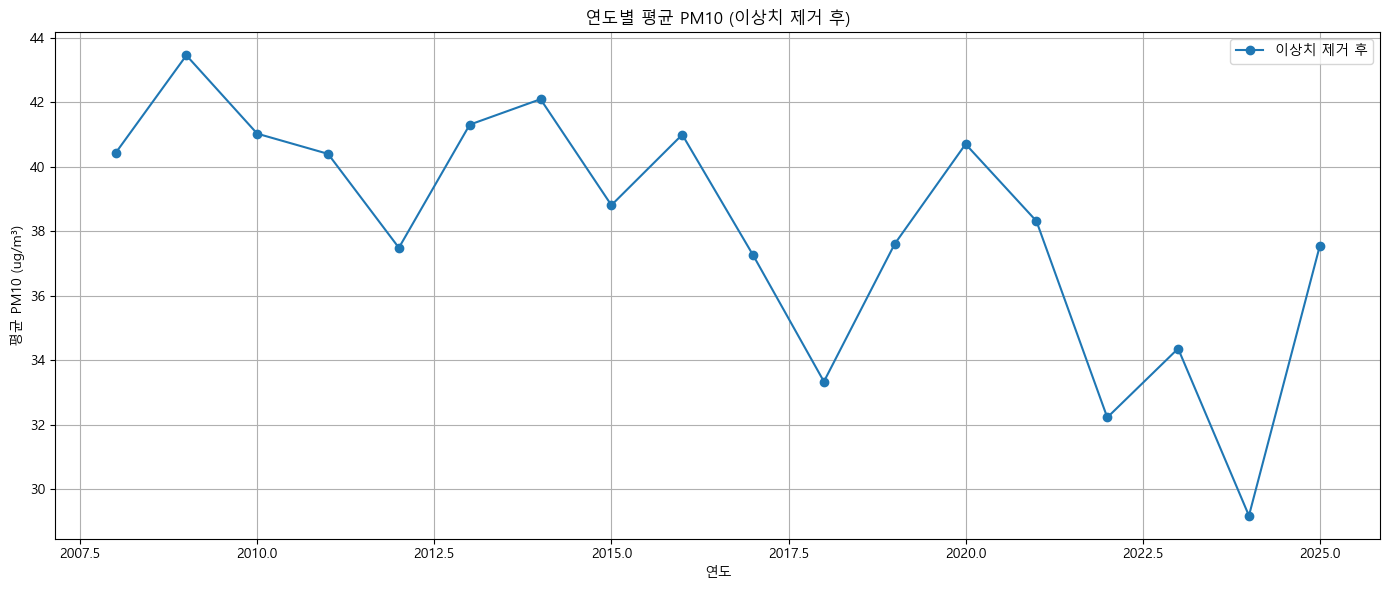

In [330]:
# 연도별 통계 다시 확인 (이상치 제거 후)
yearly_stats_no_outliers = df_pm10_no_outliers.groupby('year')['PM10_AVG'].mean().reset_index()

plt.figure(figsize=(14,6))
plt.plot(yearly_stats_no_outliers['year'], yearly_stats_no_outliers['PM10_AVG'], marker='o', label='이상치 제거 후')
plt.title('연도별 평균 PM10 (이상치 제거 후)')
plt.xlabel('연도')
plt.ylabel('평균 PM10 (ug/m³)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

이상치 제거 후 월별, 계절별 통계 확인

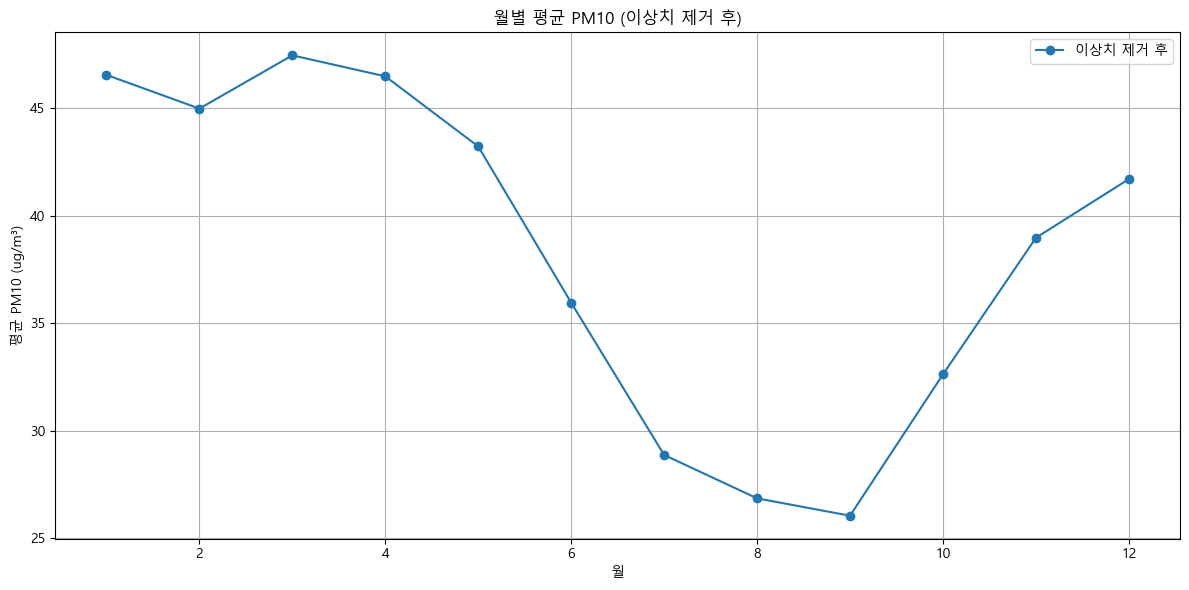

In [331]:
monthly_stats_no_outliers = df_pm10_no_outliers.groupby('month')['PM10_AVG'].mean().reset_index()

plt.figure(figsize=(12,6))
plt.plot(monthly_stats_no_outliers['month'], monthly_stats_no_outliers['PM10_AVG'], marker='o', label='이상치 제거 후')
plt.title('월별 평균 PM10 (이상치 제거 후)')
plt.xlabel('월')
plt.ylabel('평균 PM10 (ug/m³)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\01028\AppData\Local\Temp\ipykernel_51888\4214078387.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pm10_no_outliers['season'] = df_pm10_no_outliers['month'].apply(get_season)


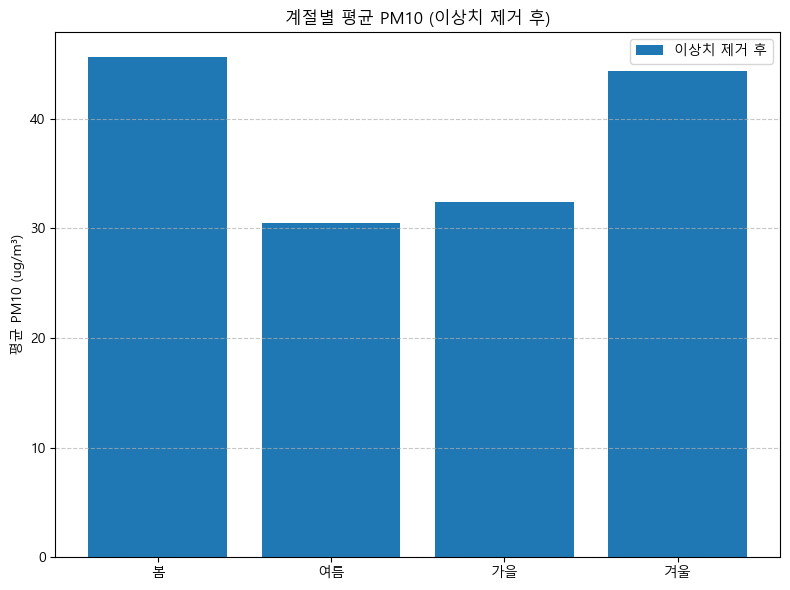

In [ ]:
# 계절 구분 함수 (다시 필요)
# def get_season(month):
#     if month in [3,4,5]:
#         return '봄'
#     elif month in [6,7,8]:
#         return '여름'
#     elif month in [9,10,11]:
#         return '가을'
#     else:
#         return '겨울'

# 계절 컬럼 생성
df_pm10_no_outliers['season'] = df_pm10_no_outliers['month'].apply(get_season)

# 계절별 통계
seasonal_stats_no_outliers = df_pm10_no_outliers.groupby('season')['PM10_AVG'].mean().reset_index()
seasonal_stats_no_outliers['season'] = pd.Categorical(seasonal_stats_no_outliers['season'], categories=['봄', '여름', '가을', '겨울'], ordered=True)
seasonal_stats_no_outliers = seasonal_stats_no_outliers.sort_values('season')

# 시각화
plt.figure(figsize=(8,6))
plt.bar(seasonal_stats_no_outliers['season'], seasonal_stats_no_outliers['PM10_AVG'], label='이상치 제거 후')
plt.title('계절별 평균 PM10 (이상치 제거 후)')
plt.ylabel('평균 PM10 (ug/m³)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


### 이상치 처리 방식: Capping(값 제한)
- 이상치를 일정 값으로 잘라내서 유지
- 이상치 값 자체를 상한선(90.8) 또는 하한선(-14) 로 잘라서 대체함

In [333]:
df_pm10_capped = df_pm10.copy()
df_pm10_capped['PM10_AVG'] = df_pm10_capped['PM10_AVG'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

이상치 crapping 후 연도별 통계 확인

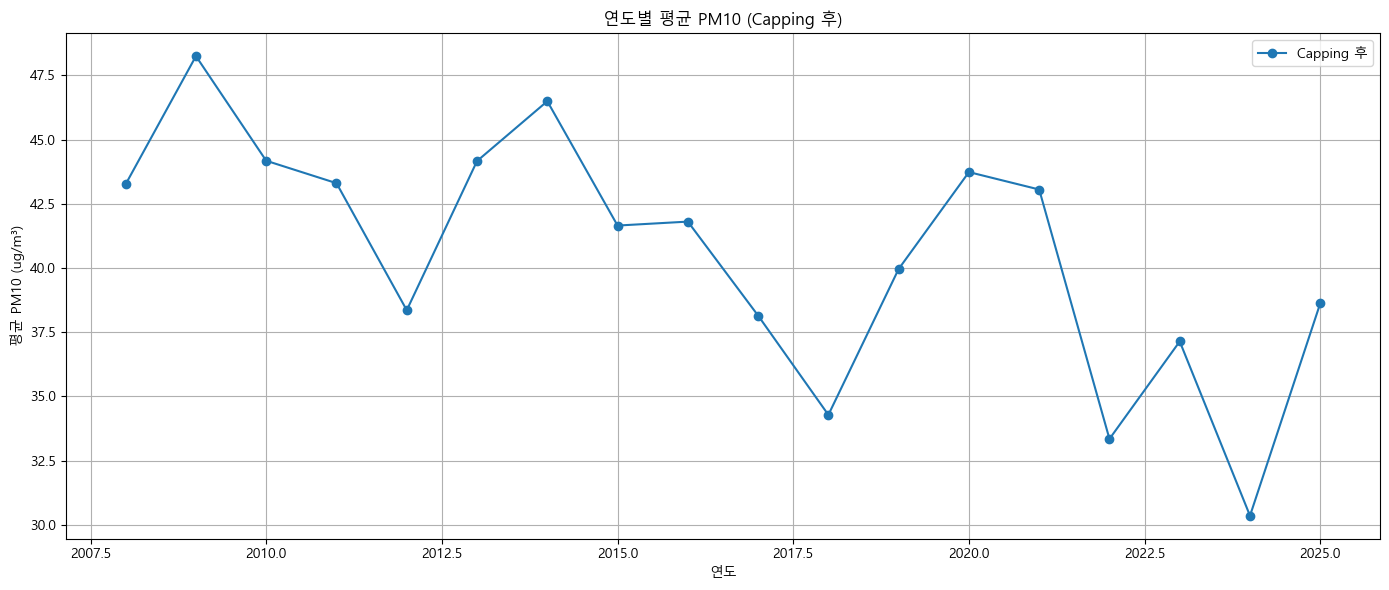

In [336]:
# 연도별 통계 (Capping 데이터)
yearly_stats_capped = df_pm10_capped.groupby('year')['PM10_AVG'].mean().reset_index()

plt.figure(figsize=(14,6))
plt.plot(yearly_stats_capped['year'], yearly_stats_capped['PM10_AVG'], marker='o', label='Capping 후')
plt.title('연도별 평균 PM10 (Capping 후)')
plt.xlabel('연도')
plt.ylabel('평균 PM10 (ug/m³)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

이상치 crapping 후 월별/ 계절별 통계 확인

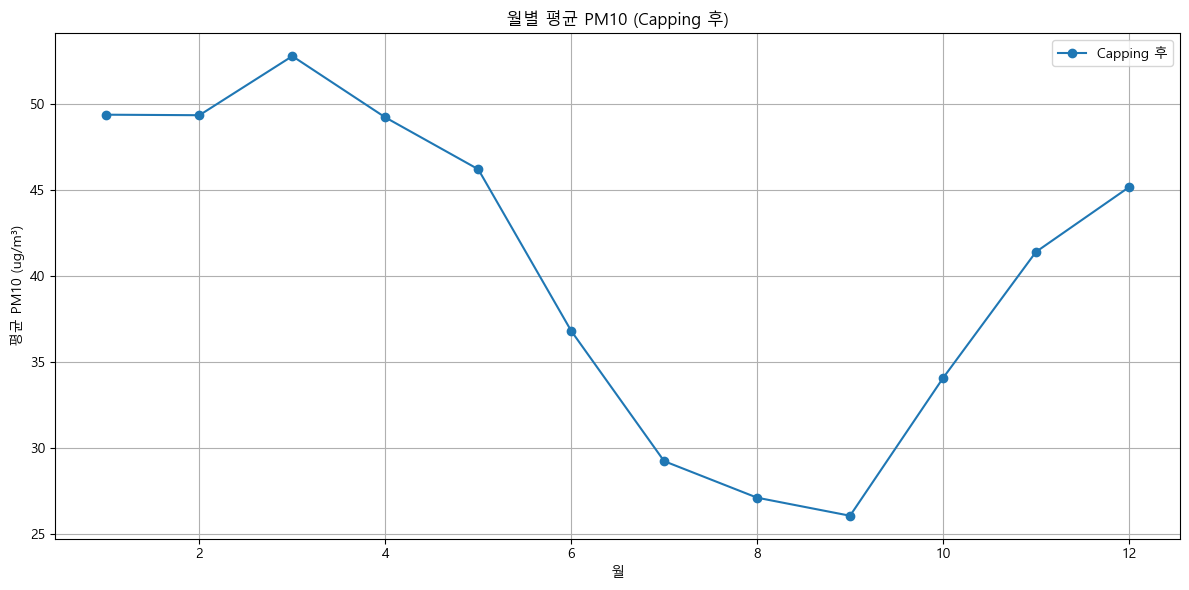

In [337]:
# 월별 통계 (Capping 데이터)
monthly_stats_capped = df_pm10_capped.groupby('month')['PM10_AVG'].mean().reset_index()

plt.figure(figsize=(12,6))
plt.plot(monthly_stats_capped['month'], monthly_stats_capped['PM10_AVG'], marker='o', label='Capping 후')
plt.title('월별 평균 PM10 (Capping 후)')
plt.xlabel('월')
plt.ylabel('평균 PM10 (ug/m³)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

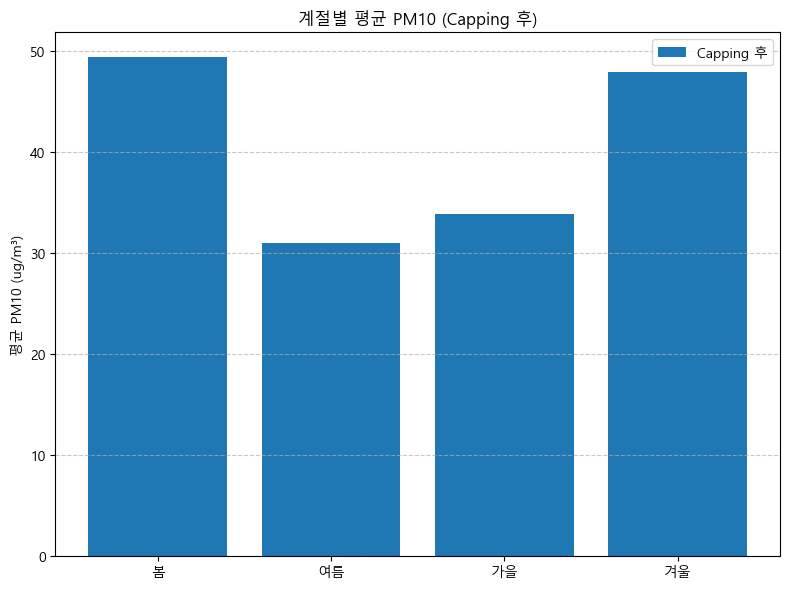

In [338]:
# 계절 구분 함수 (동일)
df_pm10_capped['season'] = df_pm10_capped['month'].apply(get_season)

seasonal_stats_capped = df_pm10_capped.groupby('season')['PM10_AVG'].mean().reset_index()
seasonal_stats_capped['season'] = pd.Categorical(seasonal_stats_capped['season'], categories=['봄', '여름', '가을', '겨울'], ordered=True)
seasonal_stats_capped = seasonal_stats_capped.sort_values('season')

plt.figure(figsize=(8,6))
plt.bar(seasonal_stats_capped['season'], seasonal_stats_capped['PM10_AVG'], label='Capping 후')
plt.title('계절별 평균 PM10 (Capping 후)')
plt.ylabel('평균 PM10 (ug/m³)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()